Advanced visualization
===

Data science is a relatively new profession which is growing rapidly world-wide with many employment opportunities in the information age which we find ourselves in. Chemical Engineers have been "Data Scientists" for decades, even before there were any computers around. Just be grateful you don't have to find Nusselt number correlations for flow across tube banks using a slide rule and some graphing paper!! 

At its heart, data science involves taking large quantities of data and using it to come to clear and useful conclusions. This can be anything: such as linking [life expectancy to per capita earnings](https://www.youtube.com/watch?v=jbkSRLYSojo) or predicting stock market trends based on economic indicators. Chemical Engineers find and use such correlations without even thinking about it: ever thought about how the expression for pipe friction factor based on wall roughness was developed? Ever considered that every time you plot log of the reaction rate versus the inverse of temperature, you are applying a model proposed by a guy called Svante Arrhenius in 1889? Relationships are at the core of any process, cause and effect, it is your job to find these connections and use them to make industrial processing faster, better, cheaper and safer!

To do this effectively requires four things: a question to be answered, sensible data, critical thinking and a few nifty tools! Before starting any data analysis be sure you know what the question is. If you don't know what you are looking for, you are NOT going to find it, no matter how hard you look. Never under estimate the requirement of sensible data. It is easy to come to conclusions regarding that temperature you measured and what influenced it. Things ALWAYS influence each other, if you look hard enough you can find correlations in the most unexpected places. If, however, you want the correlation between heating rate and sample temperature but you measured the air temperature because the thermocouple shifted during the experiment, the information is useless.

**This cannot be stressed enough:** if you find something that doesn't make sense, DO NOT accept it and find worthless correlations. Go back to the experiment or instrument and think about what could have gone wrong, check the connections, meditate on what happened during the test. Most importantly do not forget the fundamental principles you have spent so much time learning so hard: energy and mass cannot be created or destroyed, heat flows from hot to cold, the vapour pressure of a fluid is related to its temperature, you can NOT control the flow rate in a pipe twice by placing two valves in the line... etc. 

Critical thinking should always be applied, both when considering your data and finding correlations. When in doubt test it again and again and again... Unfortunately we don't have a tool that can do our thinking for us ... thankfully, else finding a job might become even more difficult! For many tasks tools already exist, a quick Google search will give you an indication of what is available. Getting them to work correctly is another matter entirely. This is the reason for this tutorial: we will demonstrate techniques that will enable you to rapidly solve some of the easier [data munging](https://en.wikipedia.org/wiki/Data_wrangling/) problems and quickly move on to finding that mind-blowing breakthrough that will change the world!

Data set selection
===
The data sets and techniques considered here are mainly based on the types commonly encountered in lab experiments, however, the tools can be applied to any information provided it is placed in the correct format. Typically in our lab the data acquisition equipment will be gathering data from a number of unrelated experiments all running at different times. Consider the real data set shown below:

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

For this tutorial we use *notebook* as opposed to *inline* in the basic tutorial, this enables interactivity with the plot. 

<IPython.core.display.Javascript object>


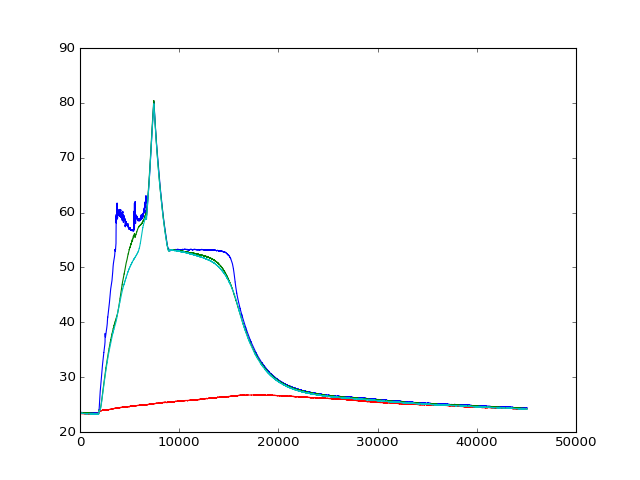

In [13]:
data = np.genfromtxt('data.txt', delimiter=",")
plt.figure()
plt.plot(data[:,1:])
plt.show()

The dataset is fairly large, containing more than 45 000 data points for four measurements. Imagine importing and plotting this in Excel! The data contains the information for an experimental run which we would like to examine but there are signals we don't need and some of the data was measured before the experiment started. What we need is a tool that will allow us to quickly select the signals we are interested in and then slice this data leaving our whatever is not part of the run so we end up with a sensible data set. Luckily for you this module has already been developed in our group, it is called DataTools. 

**NOTE** for this to work correctly you must download the notebook and DataTools Python script and open it in the Jupyter Notebook program, not the online viewer.

In [14]:
import DataTools as DT

The generated plots are fully interactive, you can move them around using the Pan button (the crossed arrows) and you can zoom in on specific regions using the Zoom button (square box). Click on the button (zoom or pan) again to stop the action. If you click on a specific plot in the "Full data set" window, it is passed to the "Selected subset" window. If you clicked on an incorrect data set, simply click on it again in the "Selected subset" window to remove it. When you are done click the blue button under "Save & Exit". This automatically creates a new file from the original with the original filename plus the extension \_Sn, where *n* is the number of the data subset, usually 1. If you want to make more than one subset select the first, click "Next" and select the new data set. You'll see the the subset number increases and when you click "Save & exit" you'll find all your data sets automatically created. Once you click "Save & exit" it may take some time to write the data to the new files, once it is done the plot will no longer be interactive.

Notice that all the plots have been scaled to lie between 0 and 1 (normalized) and the y-axis is simply the index. Once you are done the original data (unscaled) is written to the file. If a prior file with the same name exists it will be overwritten. Remember you can zoom in, select your signal and zoom back out using the house button.

<IPython.core.display.Javascript object>


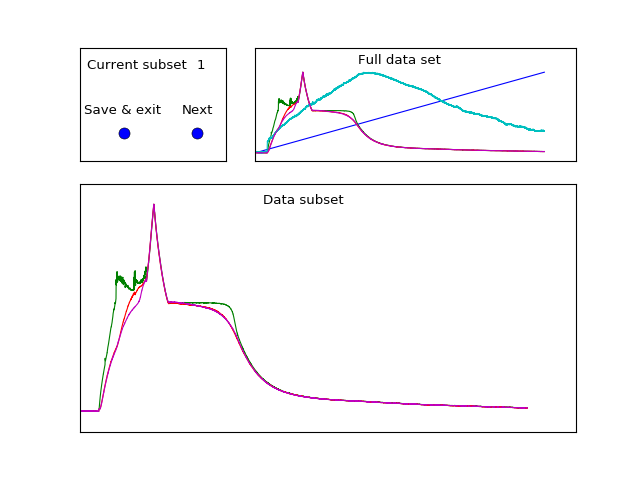

In [15]:
filename = 'data.txt'
DT.dataselector(filename)

Now that we have the signals we are interested in we can slice them up to only have the valid experimental data. Remember to use the new subset file. This functionality has also been built into the DataTools module.

The first two clicks will set the left and right initial limits, in that sequence. **This can only be done in the "Full data set" window.** Once these limits have been set they can be refined to a narrower range by clicking in either window. The limit will automatically be moved from whichever side is closest to the point where you clicked. If the range has been made too small, clicking anywhere in the gray zone will open it up again to that point. If you need to move either the left or right limit a distance larger than half the current plot, do this sequentially by clicking just to the left or right of the center of the range repeatedly (the center is indicated by the dashed black line).

Feel free to use the zoom and pan functions to find exactly the right starting point, the tool will also automatically zoom in by scaling the selected data to its current maximum and minimum value.

<IPython.core.display.Javascript object>


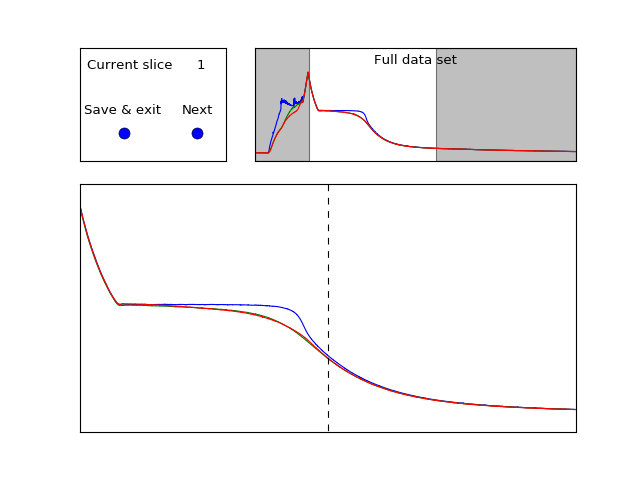

In [16]:
filename = 'data_S1.txt'
DT.dataslicer(filename)

In general, it may be convenient to reverse the sequence of selection and slicing or even repeating one more than once, this depends on the specific data set. When you are done you have your final data sets and you can start applying some options to improve visualization or use tools to explore interesting aspects of the data.

Data munging
===
In many cases we may want to filter our data. One of the ways to do this without imparting excessive time-shifting or "lag" is by central averaging. If something went wrong with the data collector we often want to remove the bad data segment, there are many ways of doing this such as linear interpolation. Some measurements can have drift, in certain cases it is convenient to remove this drift by subtracting a straight line from the data. All of these functionalities along with some others are included in the DataTools module.

The munge tool allows us to apply some basic error correction and filtering. When you click on a button that functionality is activated and the next two places you click in the "Selected input" window are used as start and end position. The exception to this is the central average filter, if you click on this it is automatically applied to the selected input. The faded version of the line is the original data. The windows both allow panning and zooming, but before applying a functionality click on the respective button again to stop that action. The functions are:
 - RlinD : Remove linear drift
 - CAV : Apply central average filter
 - Interp : Linearly interpolate
 - HLG R : Hold last good value from right hand side
 - HLG L : Hold last good value from left hand side
 - Reset : Return current input to its original state
 - Exit : Save data set to file with extra extension \_F 
 
The number with the arrows that adjust its value is the window size used for central average filtering, i.e. this is the number of samples averaged. This value is also used when interpolating, when the data is noisy it is convenient to interpolate between the average value of a few samples rather than a spot value. The *Interp* function automatically uses the number of samples specified by the value to calculate average start and end values.

<IPython.core.display.Javascript object>


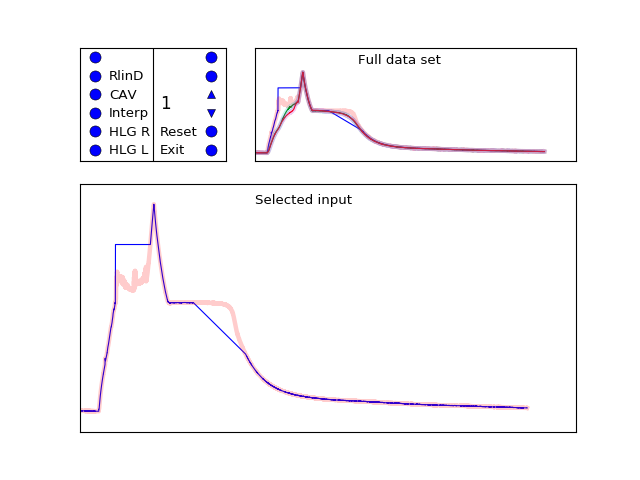

In [17]:
filename = 'data_S1.txt'
DT.datamunge(filename)

One of the most frequent tasks in data science is finding correlations, the next tool allows us to compare two signals to check if a correlation exists. Often you may want to only compare the correlation in a certain region or you might want to identify an outlier so you can decide whether to leave it out or not. The correlation tool in the DataTools module allows you to do exactly this. Select the variables you want to compare by using the arrow buttons. If you only want to consider a small region of the data, clicking in the full data set window will zoom in. The first click sets the left limit and the second the right, after this it works as before. If you visibly see an outlying data point you can click on it in the correlation window to select it. Then click "Mark", when exiting, the script creates a new column in your data set where the selected points have been marked with a value of 1. If no single point is selected, clicking "Mark" will mark all the values currently displayed in the correlation plot.

<IPython.core.display.Javascript object>


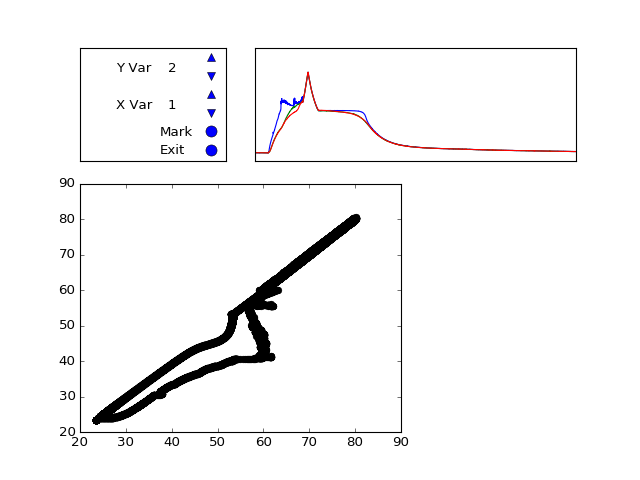

In [18]:
filename = 'data_S1.txt'
DT.datacorr(filename)

When you are comparing many variables, it is convenient to look at them all at once to identify where there are interesting correlations. Pandas has a built-in functionality to do this. Lets use it on our old experimental data from the basic tutorial.

In [10]:
import pandas
%matplotlib inline
df = pandas.read_excel('RawData.xlsx', skiprows=[1,2])
df.head()

,Experiment,Repeat,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Comments,Date
0,1,1,11.1,62.1,24.3,2.0,0.9,0.30303,600.0,NaN,Problem with measurement: data must be cut,2015-01-01
1,1,2,11.8,63.5,25.3,2.0,0.9,0.30303,600.0,NaN,No issues data good,2015-01-03
2,1,3,12.9,65.4,25.4,2.0,0.9,0.30303,600.0,NaN,No issues data good,2015-01-04
3,1,4,17.8,57.6,28.4,2.0,0.9,0.30303,600.0,NaN,No issues data good,2015-01-05
4,1,5,21.7,59.0,32.1,2.0,0.9,0.30303,600.0,NaN,No issues data good,2015-01-06


We have a choice for the diagonal elements, since the correlation of a variable to itself is pretty useless, instead we'll plot a histogram of that variable in its place:

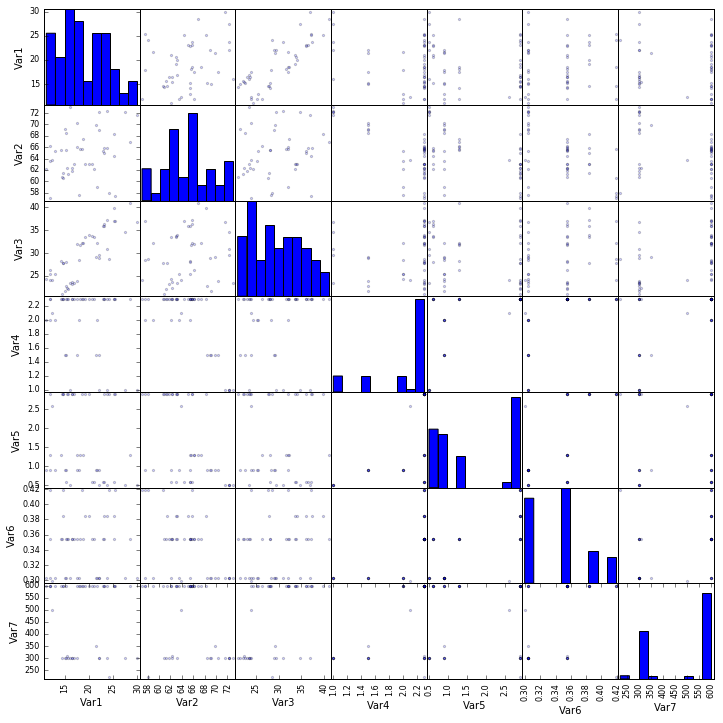

In [11]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df.iloc[:,2:9], alpha=0.2, figsize=(12, 12), diagonal='hist');

Interestingly we do not see a clear correlation between the time, Var 7 and either of the temperatures Var 1 (start) and Var 3 (end). An excellent correlation exists for the delta temperature as we already demonstrated. This shows the need to use your engineering judgment to decide which calculations are more important to answering your question. In this case energy is important not temperature, hence E = m Cp **∆T**.

Congratulations, you now have a good start towards wrangling your data to get the most out of it! 